<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Thanks for taking the time to improve the project! Now it is accepted and you can move on to the next sprint. Good luck!
    

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job, although there are a few problems that need to be fixed before the project is accepted. Let me know if you have any questions!

# Introduction

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

## Initialization

### Load up libraries

In [2]:
# Load up necessary libraries
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

### Load up datasets

In [3]:
# Load full dataset
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
# Load train dataset
train = pd.read_csv('/datasets/gold_recovery_train.csv')

In [5]:
# Load test dataset
test = pd.read_csv('/datasets/gold_recovery_test.csv')

### Visualize datasets and info

#### Full dataset

In [6]:
# Visualize full dataset
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [7]:
# Visualize full info
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


#### Train dataset

In [8]:
# Visualize train dataset
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [9]:
# Visualize train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


#### Test dataset

In [10]:
# Visualize test dataset
test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [11]:
# Visualize test info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, there is an initial inspection of the data!

</div>

### Recovery Calculations: Rougher output recovery 

#### Select columns

In [12]:
# Select columns relevant for calculation
rel_col = train.loc[:, ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]
rel_col = rel_col.fillna(method='ffill', axis=0)
rel_col.head(10)

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,19.793808,6.486150,1.170244
1,20.050975,6.478583,1.184827
2,19.737170,6.362222,1.162562
3,19.320810,6.118189,1.079755
4,19.216101,5.663707,1.012642
5,18.950385,5.687168,0.915835
6,19.319591,6.038436,0.986248
7,19.507897,6.433854,1.116110
8,19.789465,6.526612,1.186780
9,19.497669,6.633002,1.167140


In [13]:
# Create formula for calculation
def rough_out_rec(rough_out_conc, rough_in_feed, rough_out_tail):
    # Declare variables
    C = rough_out_conc
    F = rough_in_feed
    T = rough_out_tail
    
    rec_final = 100*C*(F-T) / (F*(C-T))
     
    return rec_final

In [14]:
# Calculate recovery
corr_rec = rough_out_rec(rel_col['rougher.output.concentrate_au'], rel_col['rougher.input.feed_au'], rel_col['rougher.output.tail_au'])
print(corr_rec.head(10))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
dtype: float64


In [15]:
# Calculate MAE using MAE formula
ror = train['rougher.output.recovery']
ror_diff_abs = (ror - corr_rec).abs()

print('MAE:', ror_diff_abs.sum()/ror_diff_abs.count())

MAE: 1.1101950495226952e-14


An MAE of this value shows that the recovery was calculated correctly in the train dataset

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

48 is a huge MAE (compare it with the mean value of `rougher.output.recovery`). Try calculating it only on the data where the needed values are not missing

</div>

<div class="alert alert-info">
  Indeed 48 is huge and after musch tweaking, the result is even worse. Could you please give a direct example, so I can know where my code is wrong. It'd really be a big help
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

I mean, can you just create a copy of the data where missing values are dropped and not filled and calculate recovery on that data?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok, great! Now we can see that the target values that are not missing are indeed correct

</div>

### Compare training and test set features

In [16]:
# Visualize columns
train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [17]:
# Visualize columns
test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [18]:
# Get missing columns
miss_col = []
for item in train.columns:
    if item not in test.columns:
        miss_col.append(item)
        print(item)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In [19]:
# Check the datatypes
train[miss_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


From the above analysis,the columns that are missing from the test set are outputs and calculation based on those outputs.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

It seems that you slightly misunderstood the point of this task. The columns that are missing from the test set are outputs and calculation based on those outputs. As we won't be able to obtain the values in these columns before the process is finished when the model is deployed in production, we can't use them as features in our models. Adding them back results in data leakage.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

## Data Preprocessing

### Check datasets for duplicates

In [20]:
# Check for duplicates
full.duplicated().value_counts()

False    22716
dtype: int64

In [21]:
# Check for duplicates
train.duplicated().value_counts()

False    16860
dtype: int64

In [22]:
# Check for duplicates
test.duplicated().value_counts()

False    5856
dtype: int64

Datasets contain no duplicates. Now for missing values

### Dealing with missing values

In [23]:
print(len(full))
print(len(train))

22716
16860


In [24]:
# Drop missing targets in full dataframe
n = full['rougher.output.recovery'].dropna().index
full = full.loc[n]

m = full['final.output.recovery'].dropna().index
full = full.loc[m]

len(full)

19439

In [25]:
# Drop missing values in train dataframe
a = train['rougher.output.recovery'].dropna().index
train = train.loc[a]

b = train['final.output.recovery'].dropna().index
train = train.loc[b]

len(train)

14149

All missing target values have been dropped in the full and train datasets. The test dataset has no target columns and so didn't need for them to be dropped

In [26]:
# Fill missing values using forward fill

new_train = train.fillna(method='ffill')

new_test = test.fillna(method='ffill')

Looking at the whole datasets, each column containesd similar data and for a machine learning task, its better to fill in these values to provide a full and complete dataset. The values have been forward filled as the values close in time are similar.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This method seems a little bit too crude, especially considering that there are quite a few missing values. Project instruction says that values close in time should be similar, which suggests using the last known value to fill missing values (i.e. forward fill)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

This problem still persists

</div>

<div class="alert alert-info">
  Why do you think so? I have just used forward fill as you instructed. Is there another reason as to why you think the problem still persists? Moreover, the datasets eventually used to train the models are different from these.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

Sorry, I'm an idiot! I was sure that I wrote something else in that comment, but it seems that I forgot to. My bad!
    
You indeed used a different method, so that's good! But what I actually wanted to write about is that apart from missing features, there are quite a few missing target values. For the targets, we want a higher degree of certainty in their correctness (especially for testing the models, but also for training), so we need to drop missing targets before applying any method of filling missing values. (if you make a different split, then we should drop missing targets from the full dataset before splitting it)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Ok, great!

</div>

The date column doesn't have the right data type bust seeingas we will eventually drop it before we train the model, I guess we can leave it be

## Data Analysis

### Observe concentration of metals accross purification stages

In [27]:
# Select necessary columns
conc_col = []

for value in full.columns:
    if "concentrate" in value:
        conc_col.append(value)
    if "feed" in value:
        conc_col.append(value)
        
conc_df = full[conc_col]

conc_df

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.input.feed_size,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.calculation.sulfate_to_au_concentrate,...,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,6.055403,9.889648,5.507324,42.192020,7.25,8.547551,10.389648,19.529297,34.174427,41885.707031,...,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.500771,7.101074,28.029297,19.793808
1,6.029369,9.968944,5.257781,42.701629,7.25,8.558743,10.497069,19.369147,34.118526,42050.861809,...,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.615865,7.278807,28.067063,20.050975
2,6.055926,10.213995,5.383759,42.657501,7.25,8.603505,10.354494,19.167579,33.969464,42018.101184,...,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.695753,7.216833,27.454037,19.737170
3,6.047977,9.977019,4.858634,42.689819,7.25,7.221879,8.496563,15.978538,28.260743,42029.447991,...,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.915047,7.175616,27.341277,19.320810
4,6.148599,10.142511,4.939416,42.774141,7.25,9.089428,9.986786,19.199864,33.044932,42125.354245,...,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,12.411054,7.240205,27.041023,19.216101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,3.224920,11.356233,6.803482,46.713954,6.50,6.559174,12.445966,7.056338,32.940215,45912.942619,...,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,11.124896,10.984003,30.068876,18.603550
22712,3.195978,11.349355,6.862249,46.866780,6.50,6.612376,12.623947,7.542264,32.925325,46200.099585,...,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,11.425983,10.888213,29.783972,18.441436
22713,3.109998,11.434366,6.886013,46.795691,6.50,7.128896,12.633558,7.941900,31.856742,44585.181334,...,5.970515,4.020002,555.682872,122.262690,40.074026,4.525061,8.523497,8.955135,22.786467,15.111231
22714,3.367241,11.625587,6.799433,46.408188,6.50,7.490444,12.012378,6.942972,30.770892,44084.735708,...,6.048130,3.902537,544.731687,123.742430,39.713906,4.362781,11.658799,10.655377,29.052742,17.834772


In [28]:
# Get columns for Au
au_conc_col =[] 

for value in conc_df.columns:
    if 'au' in value:
        au_conc_col.append(value)

au_conc = conc_df[au_conc_col]

au_conc.head(10)

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.input.feed_au,rougher.output.concentrate_au
0,42.192020,34.174427,41885.707031,3481.779053,3520.337158,6.486150,19.793808
1,42.701629,34.118526,42050.861809,3498.370979,3489.981857,6.478583,20.050975
2,42.657501,33.969464,42018.101184,3495.348910,3502.359819,6.362222,19.737170
3,42.689819,28.260743,42029.447991,3498.578313,3499.162912,6.118189,19.320810
4,42.774141,33.044932,42125.354245,3494.800771,3506.679315,5.663707,19.216101
5,41.633678,32.070664,41973.280986,3501.916973,3499.527175,5.687168,18.950385
6,41.995316,33.184823,41956.468979,3497.427365,3506.352790,6.038436,19.319591
7,42.452727,34.027719,41812.416893,3497.275828,3501.000030,6.433854,19.507897
8,43.404078,34.964974,41905.757985,3498.332166,3498.120075,6.526612,19.789465
9,43.235220,34.826500,41882.126352,3499.915439,3519.952954,6.633002,19.497669


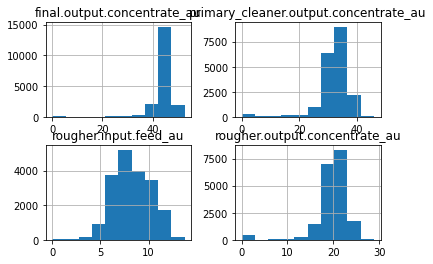

In [29]:
# Plot Au histogram to compare stages
au_conc.hist(['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.concentrate_au'])
plt.show()

From the above histograms, we can see that the concentration of gold increases in each stage with the final output concentrate having the highest gold concentration of all the stages.

In [30]:
# Get columns for Ag
ag_conc_col =[] 

for value in conc_df.columns:
    if 'ag' in value:
        ag_conc_col.append(value)

ag_conc = conc_df[ag_conc_col]

ag_conc.head(10)

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,6.100378,11.500771
1,6.029369,8.558743,6.161113,11.615865
2,6.055926,8.603505,6.116455,11.695753
3,6.047977,7.221879,6.043309,11.915047
4,6.148599,9.089428,6.060915,12.411054
5,6.482968,9.553724,5.801920,11.985584
6,6.533849,8.968869,6.056253,11.684307
7,6.130823,8.545238,5.955053,11.182624
8,5.834140,8.046686,5.878084,11.051323
9,5.687063,8.098985,5.908793,11.116297


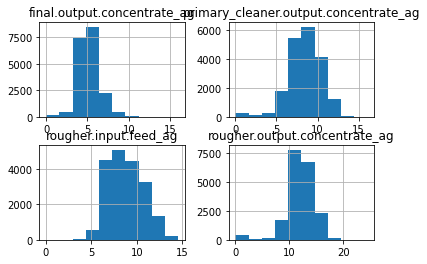

In [31]:
# Plot Ag histogram to compare stages
ag_conc.hist(ag_conc.columns)
plt.show()

From the above histograms, silver concentration seems to increase in the second stage (rougher.output.concentrate) but then falls in subsequent stages making the concentration in the final stage to be the lowest of all the stages.

In [32]:
# Get columns for Pb
pb_conc_col =[] 

for value in conc_df.columns:
    if 'pb' in value:
        pb_conc_col.append(value)

pb_conc = conc_df[pb_conc_col]

pb_conc.head(10)

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,2.284912,7.101074
1,9.968944,10.497069,2.266033,7.278807
2,10.213995,10.354494,2.159622,7.216833
3,9.977019,8.496563,2.037807,7.175616
4,10.142511,9.986786,1.786875,7.240205
5,10.049416,9.816215,1.879351,7.121903
6,10.058141,10.081306,2.105501,7.304849
7,9.935481,10.224540,2.310432,7.258496
8,10.071156,10.500065,2.391713,7.380043
9,9.980404,10.525324,2.440899,7.297363


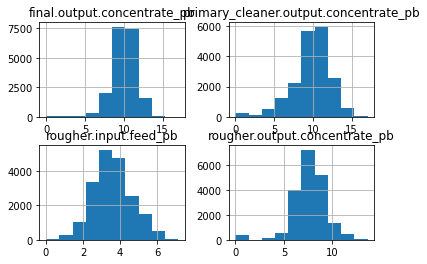

In [33]:
# Plot Pb histogram to compare stages
pb_conc.hist(pb_conc.columns)
plt.show()

From the above histograms we can see that the concentration of lead slowly increases across the first 3 stages and is highest in the third stage (primary_cleaner.output.concentrate) after wich there's a slight reduction in the final stage.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Just printing a small sample of values doesn't really get us anywhere. Let's try summarizing the data in some way. One way is to plot a histogram for each stage of each metal (try putting the histograms of different stages of the same metal on one axis for easier comparison)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Ok, what's the conclusion though?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Great!

</div>

### Compare the feed particle size distributions accross datasets

In [34]:
# Compare data from train and test datasets

test_feed_size = new_test['rougher.input.feed_size'].dropna()
train_feed_size = new_train['rougher.input.feed_size']

alpha = 0.05 #critical significance level

results = st.ttest_ind(test_feed_size, train_feed_size)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.658193921042471e-34
We reject the null hypothesis


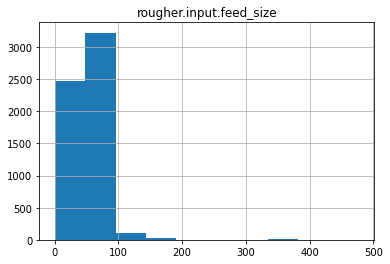

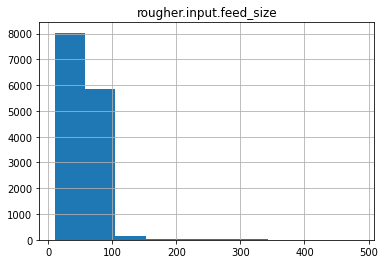

In [35]:
# Plot histogram for comparison
new_test.hist('rougher.input.feed_size')
plt.show()

new_train.hist('rougher.input.feed_size', label='Train')
plt.show()

The variation in the values of the test and train datasets is very significant. Let's get a new sample from the full dataset.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The t-test only tests whether the mean values of two samples are the same, not whether the distributions are similar or not. And even then, statistical significance only measures how likely the result is to be due to chance, but we need to think about the effect size to see if the difference is meaningful or not. It can very well be that there is tiny, but statistically significant difference (this is especially true for samples of large size).
    
By the way, we don't really need the train and test set distribution to be exactly the same (that would be very sad and it would make almost all machine learning models invalid). We just need the distributions to be approximately similar.
    
Could you please plot the histograms of the two samples here for comparison as well?

</div>

In [36]:
# Create new split
re_train, re_test = train_test_split(full, test_size = 0.25, random_state=12345)

In [37]:
re_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
9787,2017-02-25 18:59:59,4.133409,9.939991,14.611599,47.449512,70.829722,11.919113,4.925532,9.511431,4.299428,...,25.017484,-399.631804,22.929951,-400.079944,23.007578,-448.820360,20.011684,-449.770851,25.030925,-499.755404
8405,2016-12-30 04:59:59,6.264912,8.636036,12.879876,45.381330,61.906803,10.861991,2.762691,9.370230,4.026861,...,17.024740,-499.992757,14.962641,-500.030556,15.014538,-500.906852,12.021239,-500.206709,21.035960,-500.995688
10994,2017-04-17 01:59:59,5.429641,11.083504,9.442614,43.509390,69.201066,9.197867,2.794044,11.602388,2.507238,...,24.969971,-398.515818,22.918592,-399.737900,26.006475,-449.238549,23.974494,-450.086212,30.013152,-499.964897
8317,2016-12-26 12:59:59,4.484523,8.944700,12.880172,45.914473,75.355033,11.186340,3.728393,8.919303,2.947809,...,16.994538,-501.067910,15.054807,-500.639201,12.533880,-501.545827,11.979390,-500.334673,21.006130,-500.347922
13189,2017-07-17 12:59:59,3.274139,9.560047,10.188429,48.116029,52.833870,7.336521,2.945864,10.973701,3.166949,...,21.991757,-498.737394,14.973811,-379.379200,17.967770,-499.513914,13.004322,-500.119033,15.016232,-499.187401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19750,2018-04-16 21:59:59,4.987400,7.850656,6.932919,41.786578,71.910457,13.528813,2.060883,5.807828,2.232067,...,26.955688,-496.902935,20.100861,-499.618298,17.982623,-498.841303,11.988487,-499.610504,14.986523,-498.471014
4884,2016-08-05 11:59:59,5.445556,8.952285,6.411172,45.340116,50.326708,9.221758,2.927331,1.894110,4.049517,...,20.004660,-399.328475,9.986119,-399.854293,9.292217,-399.778459,4.976880,-399.977882,23.027222,-499.469003
13546,2017-08-01 09:59:59,3.912146,10.212409,7.426972,46.123212,60.823750,8.300627,3.721006,10.643486,3.619017,...,12.982780,-500.914576,9.996514,-400.050606,10.986925,-500.529286,9.025608,-499.893300,12.006470,-500.051946
2750,2016-05-08 13:59:59,4.503115,9.095947,8.726863,46.831838,52.673450,7.867313,2.403803,11.356413,3.773137,...,14.063243,-500.117426,11.940926,-500.908091,11.034758,-497.991379,5.911308,-499.581526,20.009024,-499.185014


In [38]:
re_test

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
6327,2016-10-04 14:59:59,6.794600,9.054957,16.004123,43.648261,69.972633,11.069316,3.055067,9.719336,3.595190,...,14.028001,-498.910216,13.032441,-500.358286,10.143363,-499.314485,8.147565,-499.650507,22.997377,-499.900959
14686,2017-09-17 21:59:59,5.110333,11.114576,7.572588,44.725173,69.415110,7.484338,2.814891,12.347273,2.740724,...,12.005280,-502.249154,8.916441,-401.636419,9.017671,-501.322562,7.018271,-500.837070,10.039155,-503.676153
5151,2016-08-16 14:59:59,6.441173,9.064088,11.273021,43.482633,74.092709,9.838359,2.748540,9.996859,3.466387,...,17.880962,-399.457823,10.029009,-400.402439,14.936650,-395.346330,4.959238,-400.204035,22.990928,-496.222805
618,2016-02-09 18:00:00,4.993571,11.321386,5.691245,43.493480,63.580614,10.676063,1.487393,18.834149,2.309034,...,20.016661,-496.383512,15.964599,-498.280089,18.051289,-500.899548,15.992132,-500.148410,24.973915,-499.066802
3939,2016-06-27 02:59:59,5.355851,7.035347,8.940517,47.588582,63.054522,9.120233,1.494015,13.932352,3.027215,...,17.025755,-499.709920,8.866634,-500.210883,16.966829,-499.891129,7.921560,-500.585852,24.985645,-501.155498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2016-05-20 09:59:59,5.690474,10.340794,12.371678,42.561367,65.473226,12.542838,3.520653,11.668610,4.065586,...,10.005662,-499.882557,8.023613,-499.918554,8.982407,-549.985711,5.980463,-550.089219,19.995940,-599.796366
1665,2016-03-24 09:00:00,4.952163,11.097677,NaN,42.837984,52.733484,10.958410,1.952160,15.732565,3.713153,...,11.983186,-500.005223,12.055624,-500.119869,12.031357,-499.811920,9.979719,-500.142628,19.985365,-499.934784
3832,2016-06-22 15:59:59,5.790349,9.564467,8.613087,43.601361,69.144070,8.485743,2.090250,11.116733,2.516792,...,15.948998,-498.009701,7.921544,-405.122494,15.949495,-499.088473,6.982833,-499.477869,25.022182,-500.484111
16423,2017-11-29 06:59:59,4.817210,9.004010,9.086014,48.622543,56.244179,11.845188,3.597366,11.908953,5.536300,...,17.041562,-499.914655,14.993485,-496.917821,10.979250,-499.836947,8.996918,-500.735910,12.009882,-500.458638


In [39]:
# Compare data from train and test datasets

test_feed_size = re_test['rougher.input.feed_size'].dropna()
train_feed_size = re_train['rougher.input.feed_size'].dropna()

alpha = 0.05 #critical significance level

results = st.ttest_ind(test_feed_size, train_feed_size)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.7287008562853454
We can't reject the null hypothesis


Now this is a better split and our model should be more accurate now.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yeah, sure, you can do a new train-test split if you'd like, indeed it seems to be a better split!

</div>

### Fill missing values in new dataset

In [40]:
# fill training set
re_train = re_train.fillna(method = 'ffill')

In [41]:
# fill test set
re_test = re_test.fillna(method = 'ffill')

###  Total concentrations of all substances at different stages

#### Conc tables

In [42]:
# Total conc of Au
au_conc.loc[:, ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']]

,rougher.input.feed_au,rougher.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,42.192020
1,6.478583,20.050975,42.701629
2,6.362222,19.737170,42.657501
3,6.118189,19.320810,42.689819
4,5.663707,19.216101,42.774141
...,...,...,...
22711,5.335862,18.603550,46.713954
22712,4.838619,18.441436,46.866780
22713,4.525061,15.111231,46.795691
22714,4.362781,17.834772,46.408188


In [43]:
# Total conc of Ag
ag_conc.loc[:, ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']]

,rougher.input.feed_ag,rougher.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,6.055403
1,6.161113,11.615865,6.029369
2,6.116455,11.695753,6.055926
3,6.043309,11.915047,6.047977
4,6.060915,12.411054,6.148599
...,...,...,...
22711,6.091855,11.124896,3.224920
22712,6.121323,11.425983,3.195978
22713,5.970515,8.523497,3.109998
22714,6.048130,11.658799,3.367241


In [44]:
# Total conc of Pb
pb_conc.loc[:, ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']]

,rougher.input.feed_pb,rougher.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,9.889648
1,2.266033,7.278807,9.968944
2,2.159622,7.216833,10.213995
3,2.037807,7.175616,9.977019
4,1.786875,7.240205,10.142511
...,...,...,...
22711,4.617558,10.984003,11.356233
22712,4.144989,10.888213,11.349355
22713,4.020002,8.955135,11.434366
22714,3.902537,10.655377,11.625587


#### Total concentration across all stages

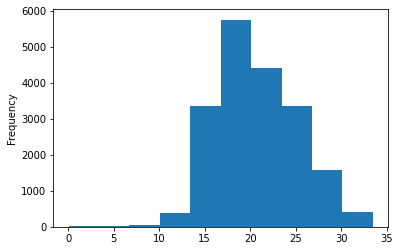

In [45]:
# Conc in feed 
feed_conc = au_conc['rougher.input.feed_au'] + ag_conc['rougher.input.feed_ag'] + pb_conc['rougher.input.feed_pb']
feed_conc.plot(kind='hist')
plt.show()

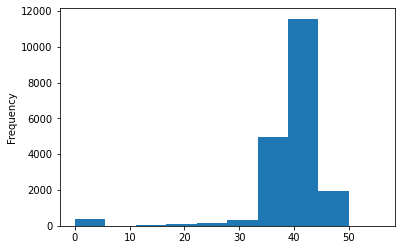

In [46]:
# Conc in rougher output
rougher_conc = au_conc['rougher.output.concentrate_au'] + ag_conc['rougher.output.concentrate_ag'] + pb_conc['rougher.output.concentrate_pb']
rougher_conc.plot(kind='hist')
plt.show()

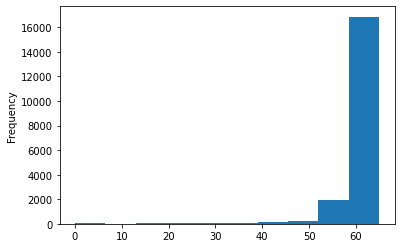

In [47]:
# Conc in final output
final_conc = au_conc['final.output.concentrate_au'] + ag_conc['final.output.concentrate_ag'] + pb_conc['final.output.concentrate_pb']
final_conc.plot(kind='hist')
plt.show()

Lookinga at the total concentration accross all stages of purification, we can see outliers. This poses a problem as it could inflate error metrics and cause problems during fitting in regression models.

Across all concentration columns, there are outliers which are both lower and higher than the acceptable values but not significantly. But considering that we are working with metals, this is a regular occurence. And in as much as removing these outliers might seem the logical thing to do, the dataset will then not represent the real life scenarios and we might risk having overfitted models and get bad results when using the same model with another dataset.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. Total concentration at some stage means summing the concentrations of all metals. E.g. for initial concentration, the total can be found by summing the `rougher.input.feed_au`, `rougher.input.feed_ag` and `rougher.input.feed_pb` columns
2. A box plot is not really an appropriate tool for distribution visualization. It is essentially only a visualization of quartiles and a couple of other statistics. Could you please plot the histograms of the total concentrations as well?

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Ok, I can agree with your assessment, although I would argue that the spike at 0 is most probably just faulty data (due to some sensor malfunction for example), and thus can be safely removed.

</div>

## Working with models

### Create a function to calculate the final sMAPE value.

In [48]:
# Create sMAPE value function

def smape(target, prediction, **kwargs):
    formula = (1/len(target)) * sum((abs((target - prediction) * 100))/((abs(target) + abs(prediction))/2))
    return formula

In [49]:
# Create final sMAPE value function

def final_smape(rougher, final):
    formula = (0.25 * rougher) + (0.75 * final)
    return formula

<div class="alert alert-success">
<b>Reviewer's comment</b>

The functions for SMAPE calculation are correct

</div>

### Create target and features

In [50]:
# Create target and features
features_train = re_train[test.columns].drop('date', axis=1)
target_1_train = re_train['final.output.recovery']
target_2_train = re_train['rougher.output.recovery']

In [51]:
# Create target and features
features_test = re_test[test.columns].drop('date', axis=1)
target_1_test = re_test['final.output.recovery']
target_2_test = re_test['rougher.output.recovery']

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

As mentioned earlier, we should only use the columns from the original test set as features (that is, without output/calculation features) to avoid data leakage

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

### Create scorer

In [52]:
scorer = make_scorer(smape, greater_is_better = False)

### Create and train models

#### Linear Regression Model 1

In [53]:
# Create model
lr_1 = LinearRegression()
lr_1.fit(features_train, target_1_train)

LinearRegression()

In [54]:
# Get sMAPE(final)
lr_pred_1 = lr_1.predict(features_test)
lr_res_1 = smape(target_1_test, lr_pred_1)
print(f'sMAPE(Final): {lr_res_1}')

sMAPE(Final): 9.095715306595219


#### Linear Regression Model 2

In [55]:
lr_2 = LinearRegression()
lr_2.fit(features_train, target_2_train)

LinearRegression()

In [56]:
# Get sMAPE(rougher)
lr_pred_2 = lr_2.predict(features_test)
lr_res_2 = smape(target_2_test, lr_pred_2)
print(f'sMAPE(Rougher): {lr_res_2}')

sMAPE(Rougher): 9.00988567062081


#### Final sMAPE with Linear Regression Model

In [57]:
# Get final sMAPE
lr_final = final_smape(lr_res_2, lr_res_1)
print(f'Final sMape: {lr_final}')

Final sMape: 9.074257897601617


#### Decision Tree Model 1

In [59]:
# Create best model
best_dt_1 = None
best_depth = 0
cross_val_dt = float('-inf')

for depth in range(1,10):
    dt_1 = DecisionTreeRegressor(max_depth= depth, random_state = 12345)
    
    cross = cross_val_score(dt_1, features_train, target_1_train, cv=5, scoring=scorer).mean()
    if cross > cross_val_dt:
        cross_val_dt = cross
        best_dt_1 = dt_1
        best_depth = depth
    
best_dt_1.fit(features_train, target_1_train)
dt_pred_1 = best_dt_1.predict(features_test)
target_1_test = target_1_test.reset_index(drop=True)
dt_pred_1 = pd.Series(dt_pred_1)
    
result = smape(target_1_test, dt_pred_1)

print("Best depth:", best_depth)

print("sMAPE(Final):", result)

Best depth: 3
sMAPE(Final): 9.369292369639007


#### Decision Tree Model 2

In [61]:
# Create best model
best_dt_2 = None
best_depth_2 = 0
cross_val_dt_2 = float('-inf')

for depth in range(1,10):
    dt_2 = DecisionTreeRegressor(max_depth= depth, random_state = 12345)
    
    cross = cross_val_score(dt_2, features_train, target_2_train, cv=5, scoring=scorer).mean()
    if cross > cross_val_dt_2:
        cross_val_dt_2 = cross
        best_dt_2 = dt_2
        best_depth_2 = depth
    
best_dt_2.fit(features_train, target_2_train)
dt_pred_2 = best_dt_2.predict(features_test)
target_2_test = target_2_test.reset_index(drop=True)
dt_pred_2 = pd.Series(dt_pred_2)
    
result_2 = smape(target_2_test, dt_pred_2)

print("Best depth:", best_depth_2)

print("sMAPE(Rougher):", result_2)

Best depth: 2
sMAPE(Rougher): 9.757754964733325


#### Final sMAPE with Decision Tree Regressor Model

In [62]:
# Get final sMAPE
dt_final = final_smape(result_2, result)
print(f'Final sMape: {dt_final}')

Final sMape: 9.466408018412587


#### Random Forest Model 1

In [63]:
# Create best model
best_rf_1 = None
ideal_est_1 = 0
ideal_depth_1 = 0
cross_val_1 = float('-inf')

for est in range(1, 11):
    for depth in range(1, 11):
        rf_1 = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state=12345)
        
        cross = cross_val_score(rf_1, features_train, target_1_train, cv=5, scoring=scorer).mean()
        if cross > cross_val_1:
            cross_val_1 = cross
            best_rf_1 = rf_1
            ideal_depth_1 = depth
    
best_rf_1.fit(features_train, target_1_train)
rf_pred_1 = best_rf_1.predict(features_test)
target_1_test = target_1_test.reset_index(drop=True)
rf_pred_1 = pd.Series(rf_pred_1)
    
result_3 = smape(target_1_test, rf_pred_1)

print("Ideal number of estimators:", ideal_est_1)

print("Ideal depth:", ideal_depth_1)

print("sMAPE(final):", result_3)

Ideal number of estimators: 0
Ideal depth: 10
sMAPE(final): 8.016127513232018


#### Random Forest Model 2

In [64]:
# Create best model
best_rf_2 = None
ideal_est_2 = 0
ideal_depth_2 = 0
cross_val_2 = float('-inf')

for est in range(1, 11):
    for depth in range(1, 11):
        rf_2 = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state=12345)
        
        cross = cross_val_score(rf_2, features_train, target_2_train, cv=5, scoring=scorer).mean()
        if cross > cross_val_2:
            cross_val_2 = cross
            best_rf_2 = rf_2
            ideal_depth_2 = depth
    
best_rf_2.fit(features_train, target_2_train)
rf_pred_2 = best_rf_2.predict(features_test)
target_2_test = target_2_test.reset_index(drop=True)
rf_pred_2 = pd.Series(rf_pred_2)
    
result_4 = smape(target_2_test, rf_pred_2)

print("Ideal number of estimators:", ideal_est_2)

print("Ideal depth:", ideal_depth_2)

print("sMAPE(rougher):", result_4)

Ideal number of estimators: 0
Ideal depth: 5
sMAPE(rougher): 8.643481084933683


#### Final sMAPE with Random Forest Regressor Model

In [65]:
# Get final sMAPE
rf_final = final_smape(result_4, result_3)
print(f'Final sMAPE: {rf_final}')

Final sMAPE: 8.172965906157433


#### Sanity check

In [66]:
# Comapre with dummy regressor
dummy_1 = DummyRegressor(strategy= 'mean')
dummy_1.fit(features_train, target_1_train)
dum_pred_1 = dummy_1.predict(features_test)
f_smape = smape(target_1_test, dum_pred_1)
print(f_smape)

10.699717314528431


In [67]:
# Comapre with dummy regressor
dummy_2 = DummyRegressor(strategy= 'mean')
dummy_2.fit(features_train, target_2_train)
dum_pred_2 = dummy_2.predict(features_test)
r_smape = smape(target_2_test, dum_pred_2)
print(r_smape)

10.568391940016538


In [68]:
d_final = final_smape(r_smape, f_smape)
print(d_final)

10.66688597090046


Seeing as the dummy regressor predicted the highest values of all sMAPE scores, we can be sure that our models actually work and aren't just predicting means or medians.

# Conclusion

For this task, the random forest model is the best to use for this tasks as it has the lowest Final sMAPE though it's the slowest of the three models. 
If speed is important, then the linear regression model would be preferable as this is a faster model and more accurate than the decision tree model for this task as it has a lower Final sMAPE.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

A couple of points:
    
1. Could you please use SMAPE as the scoring for cross-validation instead of whatever you're using now? You can make a scoring object for `cross_val_score` or `GridSearchCV` out of your scoring function using [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html), for details check out [this page](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
2. I'm not sure how you came to the conclusion that linear regression is the best model, as the other models show NaN values instead of a valid score. The only way that this could occur is if for some examples both prediction and target are 0. I would suggest removing all rows with 0 targets to fix this (0 targets are not compatible with the SMAPE metric).
3. Please also add a comparison with a simple baseline, for example a constant model always predicting mean or median of train set targets (e.g. using [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Ok problems 2 and 3 were fixed, but problem 1 is still there: in fact it's even worse, because now you're not using cross-validation at all, and tuning the models using the test set. That is not a good idea, because tuning the models' hyperparameters using the test set leads to an overly optimistic test set metrics. To get an unbiased estimate of how well the model generalizes to new data, we need to use completely new data, which is not used for training or hyperparameter tuning, and a model can only be evaluated on the test set just once for that assumption to hold.
    

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

Ok, now you're using cross-validation with the SMAPE metric, so that's great! But there's one slight discrepancy: when tuning hyperparameters, you're actually selecting the model with the highest error value (e.g. `if cross > cross_val_1`, etc.). Btw this can be easily fixed by setting `greater_is_better` parameter of `make_scorer` to False, then the SMAPE value will be multiplied by -1, and you will be correctly selecting the value closest to 0 (nevermind that it will be multiplied by -1): in fact GridSearchCV and similar objects also internally always maximize the score as returned by the scoring object, and multiplying the metric by -1 by setting `greater_is_better=False` flips the function and turns minima into maxima and vice versa (think of what happens when we multiply y=x^2 by -1 to get y=-x^2 for example). This is useful for error functions like SMAPE or MAE, which we want to minimize and not maximize (like metrics such as accuracy, precision, etc.), and also why in [predefined metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) of scikit-learn you can find `neg_mean_squared_error` instead of `mean_squared_error` and so on.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Fixed!

</div>